
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● 'No_show' it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
1- What is the overall appointment show-up vs. no show-up rate?

2- What factors are important to predict if a patient will show up for their scheduled appointment?


In [1]:
# import statements for all of the packages that I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will :

load in the data.

check for cleanliness.

trim and clean dataset for analysis.

### General Properties


In [2]:
# Load data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#data size
df.shape

(110527, 14)

Data consist of 110527 appointments and 14 columns.

In [4]:
#Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we notice :

* No missing values.

* Type of data in ScheduledDay, AppointmentDay and No-show is wrong.

In [5]:
#Getting to know the rough value distribution of each column.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We notice :

* minimum age is -1 and this is illogical.

In [7]:
#checking for duplicates
df.duplicated().sum()

0

There is no duplicates

In [8]:
#Checking for null values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Data Cleaning

In [9]:
#Correcting errors in the names of some columns
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [10]:
#converting columns that has date to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [12]:
# return all Age entries equal or less than 0.
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
df.drop(df.query("Age == -1").index,inplace=True)

The wrong age input removed.

In [14]:
#convert no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot or goupby
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace = True)
#convert the type to boolean
df['No_show'] = df['No_show'].astype('bool', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(1), int64(8), object(2)
memory usage: 11.9+ MB


We notice our editings in types of data.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the overall appointment show-up vs. no show-up rate?)

Knowing the percentage of no-show is useful in knowing the value of follow-up and knowing the cause of the defect.

In [16]:
# Shortcuts
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

79.8065613521


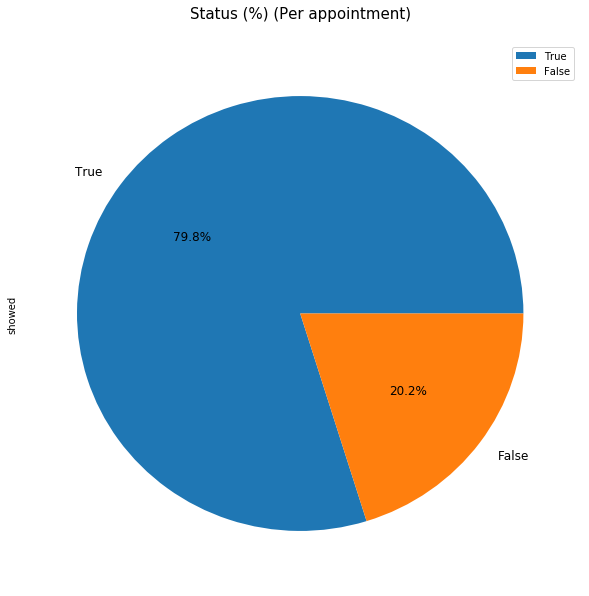

In [17]:
allP = df['showed'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

The no-show precentage is 20.2% and it is not small.

### Research Question 2  (What factors are important to predict if a patient will show up for their scheduled appointment?)

Females who missed their appointment percentage:  20.31
Males who missed their appointment percentage:  19.97


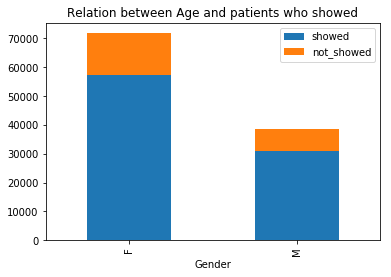

In [34]:
#Gender study
df.groupby("Gender")["not_showed"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","not_showed"]);
plt.title("Relation between Age and patients who showed")

Gender_count = df.groupby("Gender")["not_showed"].value_counts()

print("Females who missed their appointment percentage: ",round(Gender_count[1]/(Gender_count[0]+Gender_count[1])*100,2))
print("Males who missed their appointment percentage: ",round(Gender_count[3]/(Gender_count[3]+Gender_count[2])*100,2))

We can notice that gender doesn't affect in attendance.

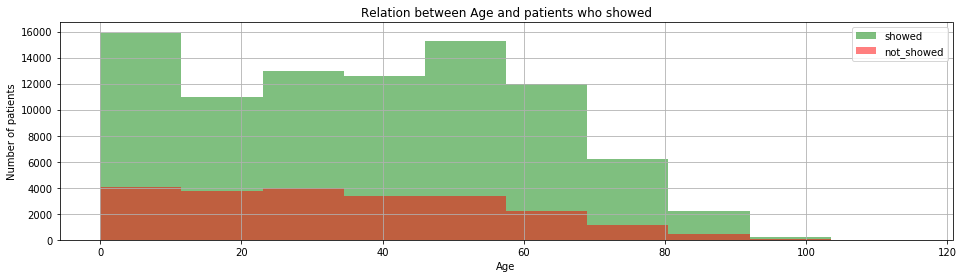

In [25]:
#Age study
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,4])
    df[col_name][showed].hist(alpha=0.5,bins=10,color='green',label='showed')
    df[col_name][not_showed].hist(alpha=0.5,bins=10,color='red',label='not_showed')
    plt.legend();
    plt.title('Relation between Age and patients who showed')
    plt.xlabel('Age')
    plt.ylabel('Number of patients');
attendance(df,'Age',showed,not_showed)

We notice that :

ages from 0 to 8 approximately are the most attendance. 

then ages from 45 to 55. 

ages above 80 approximately are the least attendance.

patients who have no scolarship who missed their appointment percentage:  20.31
patients who have scolarship who missed their appointment percentage:  19.97


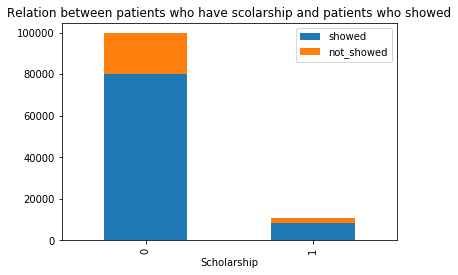

In [40]:
#Scholarship study
df.groupby("Scholarship")["not_showed"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","not_showed"]);
plt.title("Relation between patients who have scolarship and patients who showed")


scolarship_count = df.groupby("Scholarship")["not_showed"].value_counts()

print("patients who have no scolarship who missed their appointment percentage: ",round(Gender_count[1]/(Gender_count[0]+Gender_count[1])*100,2))
print("patients who have scolarship who missed their appointment percentage: ",round(Gender_count[3]/(Gender_count[3]+Gender_count[2])*100,2))


We can notice that scolarship doesn't affect in attendance.

Text(0.5,1,'Relation between patients who have Hypertension and patients who showed')

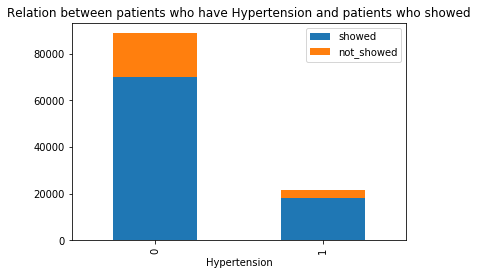

In [42]:
#Hypertension study
df.groupby("Hypertension")["not_showed"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","not_showed"]);
plt.title("Relation between patients who have Hypertension and patients who showed")

We can notice that Hypertension doesn't affect in attendance.

Text(0.5,1,'Relation between Diabetes and patients who showed')

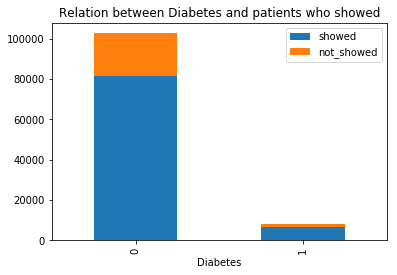

In [44]:
#Diabetes study
df.groupby("Diabetes")["not_showed"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","not_showed"]);
plt.title("Relation between Diabetes and patients who showed")


We can notice that Diabetes doesn't affect in attendance.

Text(0.5,1,'Relation between Alcoholism and patients who showed')

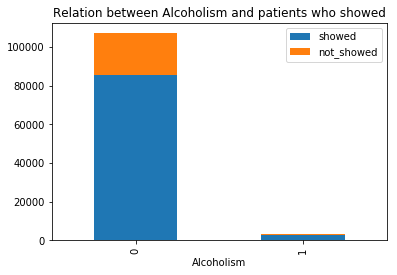

In [46]:
#Alcoholism study
df.groupby("Alcoholism")["not_showed"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","not_showed"]);
plt.title("Relation between Alcoholism and patients who showed")


We can notice that Alcoholism doesn't affect in attendance.

Text(0.5,1,'Relation between Handicap and patients who showed')

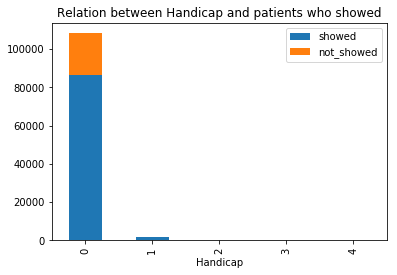

In [49]:
#Handicap study
df.groupby("Handicap")["not_showed"].value_counts().unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","not_showed"]);
plt.title("Relation between Handicap and patients who showed")


We can notice that Handicap doesn't affect in attendance.

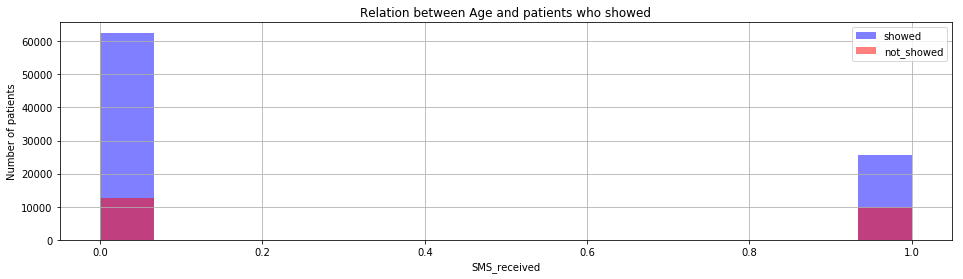

In [37]:
#SMS_received study
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,4])
    df[col_name][showed].hist(alpha=0.5,bins=15,color='blue',label='showed')
    df[col_name][not_showed].hist(alpha=0.5,bins=15,color='red',label='not_showed')
    plt.legend();
    plt.title('Relation between Age and patients who showed')
    plt.xlabel('SMS_received')
    plt.ylabel('Number of patients');
attendance(df,'SMS_received',showed,not_showed)

We notice that :

Those who received messages were less than those who did not receive messages.

The attendance rate of those who received messages is much lower than the attendance rate of those who did not receive the messages.

<a id='conclusions'></a>
## Conclusions
We conclude from our investigation that : 

* Approximately 20.2% of people did not show their appointment.

* Age is the most important factor to predict if a patient will show up for their scheduled appointment or not.

* Gender, scolarship, and Alcoholism do not have a significant impact on adherence to the time of attendance.

* The patient’s disease, such as Hypertension, Diabetes, and Handicap, does not affect his attendance significantly with the different type of disease.

* Receipt of SMS does not necessarily entail attendence.


### Limitations
* The dataset didn't explain why the patient comes to the doctor, which may give an additional explanation for why they miss their appointments.

* There were some illogical data such as patients with age 0.


In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0